# Importing Libraries

In [1]:
# Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis
from scipy.stats import chi2_contingency
from scipy import stats
from factor_analyzer import FactorAnalyzer

# Data Pre-processing
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Performance Testing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Miscellaneous
import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('fivethirtyeight')

# 1) Data Collection

In [2]:
df=pd.read_csv(r"C:\Users\Gobi J\OneDrive\Desktop\Cancer Mortality\incd.csv")

In [3]:
df

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9
...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,"Sweetwater County, Wyoming(6,10)",56037,39.9,30.5,51.1,14,stable,12.6,-18.1,54.9
3137,3137,"Teton County, Wyoming(6,10)",56039,23.7,14.7,36.1,5,stable,-19.6,-35.5,0.1
3138,3138,"Uinta County, Wyoming(6,10)",56041,31.7,20.8,46.1,6,stable,-0.1,-18.3,22
3139,3139,"Washakie County, Wyoming(6,10)",56043,50,33.8,72.2,6,stable,13.5,-12.2,46.7


# 2) Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   index                                               3141 non-null   int64 
 1   County                                              3141 non-null   object
 2    FIPS                                               3141 non-null   int64 
 3   Age-Adjusted Incidence Rate(Ê) - cases per 100,000  3141 non-null   object
 4   Lower 95% Confidence Interval                       3141 non-null   object
 5   Upper 95% Confidence Interval                       3141 non-null   object
 6   Average Annual Count                                3141 non-null   object
 7   Recent Trend                                        3141 non-null   object
 8   Recent 5-Year Trend (ˆ) in Incidence Rates          3141 non-null   object
 9   Lower 95

In [5]:
# Converting object to float data type
df['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'] = pd.to_numeric(df['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'],errors = 'coerce')
df['Lower 95% Confidence Interval'] = pd.to_numeric(df['Lower 95% Confidence Interval'],errors = 'coerce')
df['Upper 95% Confidence Interval'] = pd.to_numeric(df['Upper 95% Confidence Interval'],errors = 'coerce')
df['Average Annual Count'] = pd.to_numeric(df['Average Annual Count'],errors = 'coerce')
df['Recent 5-Year Trend (ˆ) in Incidence Rates'] = pd.to_numeric(df['Recent 5-Year Trend (ˆ) in Incidence Rates'],errors = 'coerce')
df['Lower 95% Confidence Interval.1'] = pd.to_numeric(df['Lower 95% Confidence Interval.1'],errors = 'coerce')
df['Upper 95% Confidence Interval.1'] = pd.to_numeric(df['Upper 95% Confidence Interval.1'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   index                                               3141 non-null   int64  
 1   County                                              3141 non-null   object 
 2    FIPS                                               3141 non-null   int64  
 3   Age-Adjusted Incidence Rate(Ê) - cases per 100,000  2640 non-null   float64
 4   Lower 95% Confidence Interval                       2719 non-null   float64
 5   Upper 95% Confidence Interval                       2719 non-null   float64
 6   Average Annual Count                                2719 non-null   float64
 7   Recent Trend                                        3141 non-null   object 
 8   Recent 5-Year Trend (ˆ) in Incidence Rates          2672 non-null   float64
 9

## 2.1) Dropping unwanted Features

In [6]:
index = df['index']
df = df.drop('index',axis=1)

In [7]:
df

,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614.0,falling,-2.5,-3.0,-2.0
1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43.0,stable,0.5,-14.9,18.6
2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170.0,stable,3.0,-10.2,18.3
3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25.0,stable,-6.4,-18.3,7.3
4,"Bibb County, Alabama(6,10)",1007,86.4,71.0,104.2,23.0,stable,-4.5,-31.4,32.9
...,...,...,...,...,...,...,...,...,...,...
3136,"Sweetwater County, Wyoming(6,10)",56037,39.9,30.5,51.1,14.0,stable,12.6,-18.1,54.9
3137,"Teton County, Wyoming(6,10)",56039,23.7,14.7,36.1,5.0,stable,-19.6,-35.5,0.1
3138,"Uinta County, Wyoming(6,10)",56041,31.7,20.8,46.1,6.0,stable,-0.1,-18.3,22.0
3139,"Washakie County, Wyoming(6,10)",56043,50.0,33.8,72.2,6.0,stable,13.5,-12.2,46.7


## 2.2) Handling Negative Values

In [8]:
print("Count of Negative Values: ")
print("Age-Adjusted Incidence Rate - cases per 100,000 ->",(df['Age-Adjusted Incidence Rate(Ê) - cases per 100,000']<0).sum())
print("Lower 95% Confidence Interval                   ->",(df['Lower 95% Confidence Interval']<0).sum())
print("Upper 95% Confidence Interval                   ->",(df['Upper 95% Confidence Interval']<0).sum())
print("Average Annual Count                            ->",(df['Average Annual Count']<0).sum())
print("Recent 5-Year Trend (ˆ) in Incidence Rates      ->",(df['Recent 5-Year Trend (ˆ) in Incidence Rates']<0).sum())
print("Lower 95% Confidence Interval.1                 ->",(df['Lower 95% Confidence Interval.1']<0).sum())
print("Upper 95% Confidence Interval.1                 ->",(df['Upper 95% Confidence Interval.1']<0).sum())

Count of Negative Values: 
Age-Adjusted Incidence Rate - cases per 100,000 -> 0
Lower 95% Confidence Interval                   -> 0
Upper 95% Confidence Interval                   -> 0
Average Annual Count                            -> 0
Recent 5-Year Trend (ˆ) in Incidence Rates      -> 1700
Lower 95% Confidence Interval.1                 -> 2629
Upper 95% Confidence Interval.1                 -> 200


In [9]:
df['Recent 5-Year Trend (ˆ) in Incidence Rates'] = df['Recent 5-Year Trend (ˆ) in Incidence Rates']+abs(df['Recent 5-Year Trend (ˆ) in Incidence Rates'].min())
df['Lower 95% Confidence Interval.1'] = df['Lower 95% Confidence Interval.1']+abs(df['Lower 95% Confidence Interval.1'].min())
df['Upper 95% Confidence Interval.1'] = df['Upper 95% Confidence Interval.1']+abs(df['Upper 95% Confidence Interval.1'].min())

In [10]:
print("Recent 5-Year Trend (ˆ) in Incidence Rates ->",(df['Recent 5-Year Trend (ˆ) in Incidence Rates']<0).sum())
print("Lower 95% Confidence Interval.1            ->",(df['Lower 95% Confidence Interval.1']<0).sum())
print("Upper 95% Confidence Interval.1            ->",(df['Upper 95% Confidence Interval.1']<0).sum())

Recent 5-Year Trend (ˆ) in Incidence Rates -> 0
Lower 95% Confidence Interval.1            -> 0
Upper 95% Confidence Interval.1            -> 0


In [11]:
df

,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614.0,falling,37.6,66.0,10.1
1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43.0,stable,40.6,54.1,30.7
2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170.0,stable,43.1,58.8,30.4
3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25.0,stable,33.7,50.7,19.4
4,"Bibb County, Alabama(6,10)",1007,86.4,71.0,104.2,23.0,stable,35.6,37.6,45.0
...,...,...,...,...,...,...,...,...,...,...
3136,"Sweetwater County, Wyoming(6,10)",56037,39.9,30.5,51.1,14.0,stable,52.7,50.9,67.0
3137,"Teton County, Wyoming(6,10)",56039,23.7,14.7,36.1,5.0,stable,20.5,33.5,12.2
3138,"Uinta County, Wyoming(6,10)",56041,31.7,20.8,46.1,6.0,stable,40.0,50.7,34.1
3139,"Washakie County, Wyoming(6,10)",56043,50.0,33.8,72.2,6.0,stable,53.6,56.8,58.8


## 2.3) Handling Missing Values

In [12]:
df.isnull().sum()

County                                                  0
 FIPS                                                   0
Age-Adjusted Incidence Rate(Ê) - cases per 100,000    501
Lower 95% Confidence Interval                         422
Upper 95% Confidence Interval                         422
Average Annual Count                                  422
Recent Trend                                            0
Recent 5-Year Trend (ˆ) in Incidence Rates            469
Lower 95% Confidence Interval.1                       469
Upper 95% Confidence Interval.1                       469
dtype: int64

### 2.3.1) Mean Imputation for Numerical Columns

In [13]:
df['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].fillna(df['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].mean(),inplace=True)
df['Lower 95% Confidence Interval'].fillna(df['Lower 95% Confidence Interval'].mean(),inplace=True)
df['Upper 95% Confidence Interval'].fillna(df['Upper 95% Confidence Interval'].mean(),inplace=True)
df['Average Annual Count'].fillna(df['Average Annual Count'].mean(),inplace=True)
df['Recent 5-Year Trend (ˆ) in Incidence Rates'].fillna(df['Recent 5-Year Trend (ˆ) in Incidence Rates'].mean(),inplace=True)
df['Lower 95% Confidence Interval.1'].fillna(df['Lower 95% Confidence Interval.1'].mean(),inplace=True)
df['Upper 95% Confidence Interval.1'].fillna(df['Upper 95% Confidence Interval.1'].mean(),inplace=True)

In [14]:
df.isnull().sum()

County                                                0
 FIPS                                                 0
Age-Adjusted Incidence Rate(Ê) - cases per 100,000    0
Lower 95% Confidence Interval                         0
Upper 95% Confidence Interval                         0
Average Annual Count                                  0
Recent Trend                                          0
Recent 5-Year Trend (ˆ) in Incidence Rates            0
Lower 95% Confidence Interval.1                       0
Upper 95% Confidence Interval.1                       0
dtype: int64

## 2.4) Handling Categorical Data

### 2.4.1) Replacing Placeholders

In [15]:
df.tail(10)

,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
3131,"Niobrara County, Wyoming(6,10)",56027,69.93947,57.694226,84.786981,155.190879,*,38.638286,51.202208,32.807036
3132,"Park County, Wyoming(6,10)",56029,36.30000,28.400000,46.100000,15.000000,stable,35.900000,57.200000,16.000000
3133,"Platte County, Wyoming(6,10)",56031,52.00000,36.400000,73.500000,7.000000,stable,40.800000,63.100000,19.900000
3134,"Sheridan County, Wyoming(6,10)",56033,52.00000,42.000000,63.700000,20.000000,stable,35.800000,56.500000,16.900000
3135,"Sublette County, Wyoming(6,10)",56035,69.93947,57.694226,84.786981,155.190879,*,38.638286,51.202208,32.807036
3136,"Sweetwater County, Wyoming(6,10)",56037,39.90000,30.500000,51.100000,14.000000,stable,52.700000,50.900000,67.000000
3137,"Teton County, Wyoming(6,10)",56039,23.70000,14.700000,36.100000,5.000000,stable,20.500000,33.500000,12.200000
3138,"Uinta County, Wyoming(6,10)",56041,31.70000,20.800000,46.100000,6.000000,stable,40.000000,50.700000,34.100000
3139,"Washakie County, Wyoming(6,10)",56043,50.00000,33.800000,72.200000,6.000000,stable,53.600000,56.800000,58.800000
3140,"Weston County, Wyoming(6,10)",56045,44.90000,27.900000,69.600000,4.000000,stable,13.900000,3.600000,69.500000


In [16]:
df['Recent Trend'].replace(['*','_','__'], ['falling','stable','rising'], inplace=True)

In [17]:
df.tail(10)

,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
3131,"Niobrara County, Wyoming(6,10)",56027,69.93947,57.694226,84.786981,155.190879,falling,38.638286,51.202208,32.807036
3132,"Park County, Wyoming(6,10)",56029,36.30000,28.400000,46.100000,15.000000,stable,35.900000,57.200000,16.000000
3133,"Platte County, Wyoming(6,10)",56031,52.00000,36.400000,73.500000,7.000000,stable,40.800000,63.100000,19.900000
3134,"Sheridan County, Wyoming(6,10)",56033,52.00000,42.000000,63.700000,20.000000,stable,35.800000,56.500000,16.900000
3135,"Sublette County, Wyoming(6,10)",56035,69.93947,57.694226,84.786981,155.190879,falling,38.638286,51.202208,32.807036
3136,"Sweetwater County, Wyoming(6,10)",56037,39.90000,30.500000,51.100000,14.000000,stable,52.700000,50.900000,67.000000
3137,"Teton County, Wyoming(6,10)",56039,23.70000,14.700000,36.100000,5.000000,stable,20.500000,33.500000,12.200000
3138,"Uinta County, Wyoming(6,10)",56041,31.70000,20.800000,46.100000,6.000000,stable,40.000000,50.700000,34.100000
3139,"Washakie County, Wyoming(6,10)",56043,50.00000,33.800000,72.200000,6.000000,stable,53.600000,56.800000,58.800000
3140,"Weston County, Wyoming(6,10)",56045,44.90000,27.900000,69.600000,4.000000,stable,13.900000,3.600000,69.500000


### 2.4.2) Ordinal Encoding

In [18]:
df['Recent Trend1'] = df['Recent Trend'].map({'falling':0,'stable':1,'rising':2})
df

,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Recent Trend1
0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614.0,falling,37.6,66.0,10.1,0
1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43.0,stable,40.6,54.1,30.7,1
2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170.0,stable,43.1,58.8,30.4,1
3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25.0,stable,33.7,50.7,19.4,1
4,"Bibb County, Alabama(6,10)",1007,86.4,71.0,104.2,23.0,stable,35.6,37.6,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...
3136,"Sweetwater County, Wyoming(6,10)",56037,39.9,30.5,51.1,14.0,stable,52.7,50.9,67.0,1
3137,"Teton County, Wyoming(6,10)",56039,23.7,14.7,36.1,5.0,stable,20.5,33.5,12.2,1
3138,"Uinta County, Wyoming(6,10)",56041,31.7,20.8,46.1,6.0,stable,40.0,50.7,34.1,1
3139,"Washakie County, Wyoming(6,10)",56043,50.0,33.8,72.2,6.0,stable,53.6,56.8,58.8,1


# 3) Exploratory Data Analysis

## 3.1) Univariate Analysis

### 3.1.1) Histogram

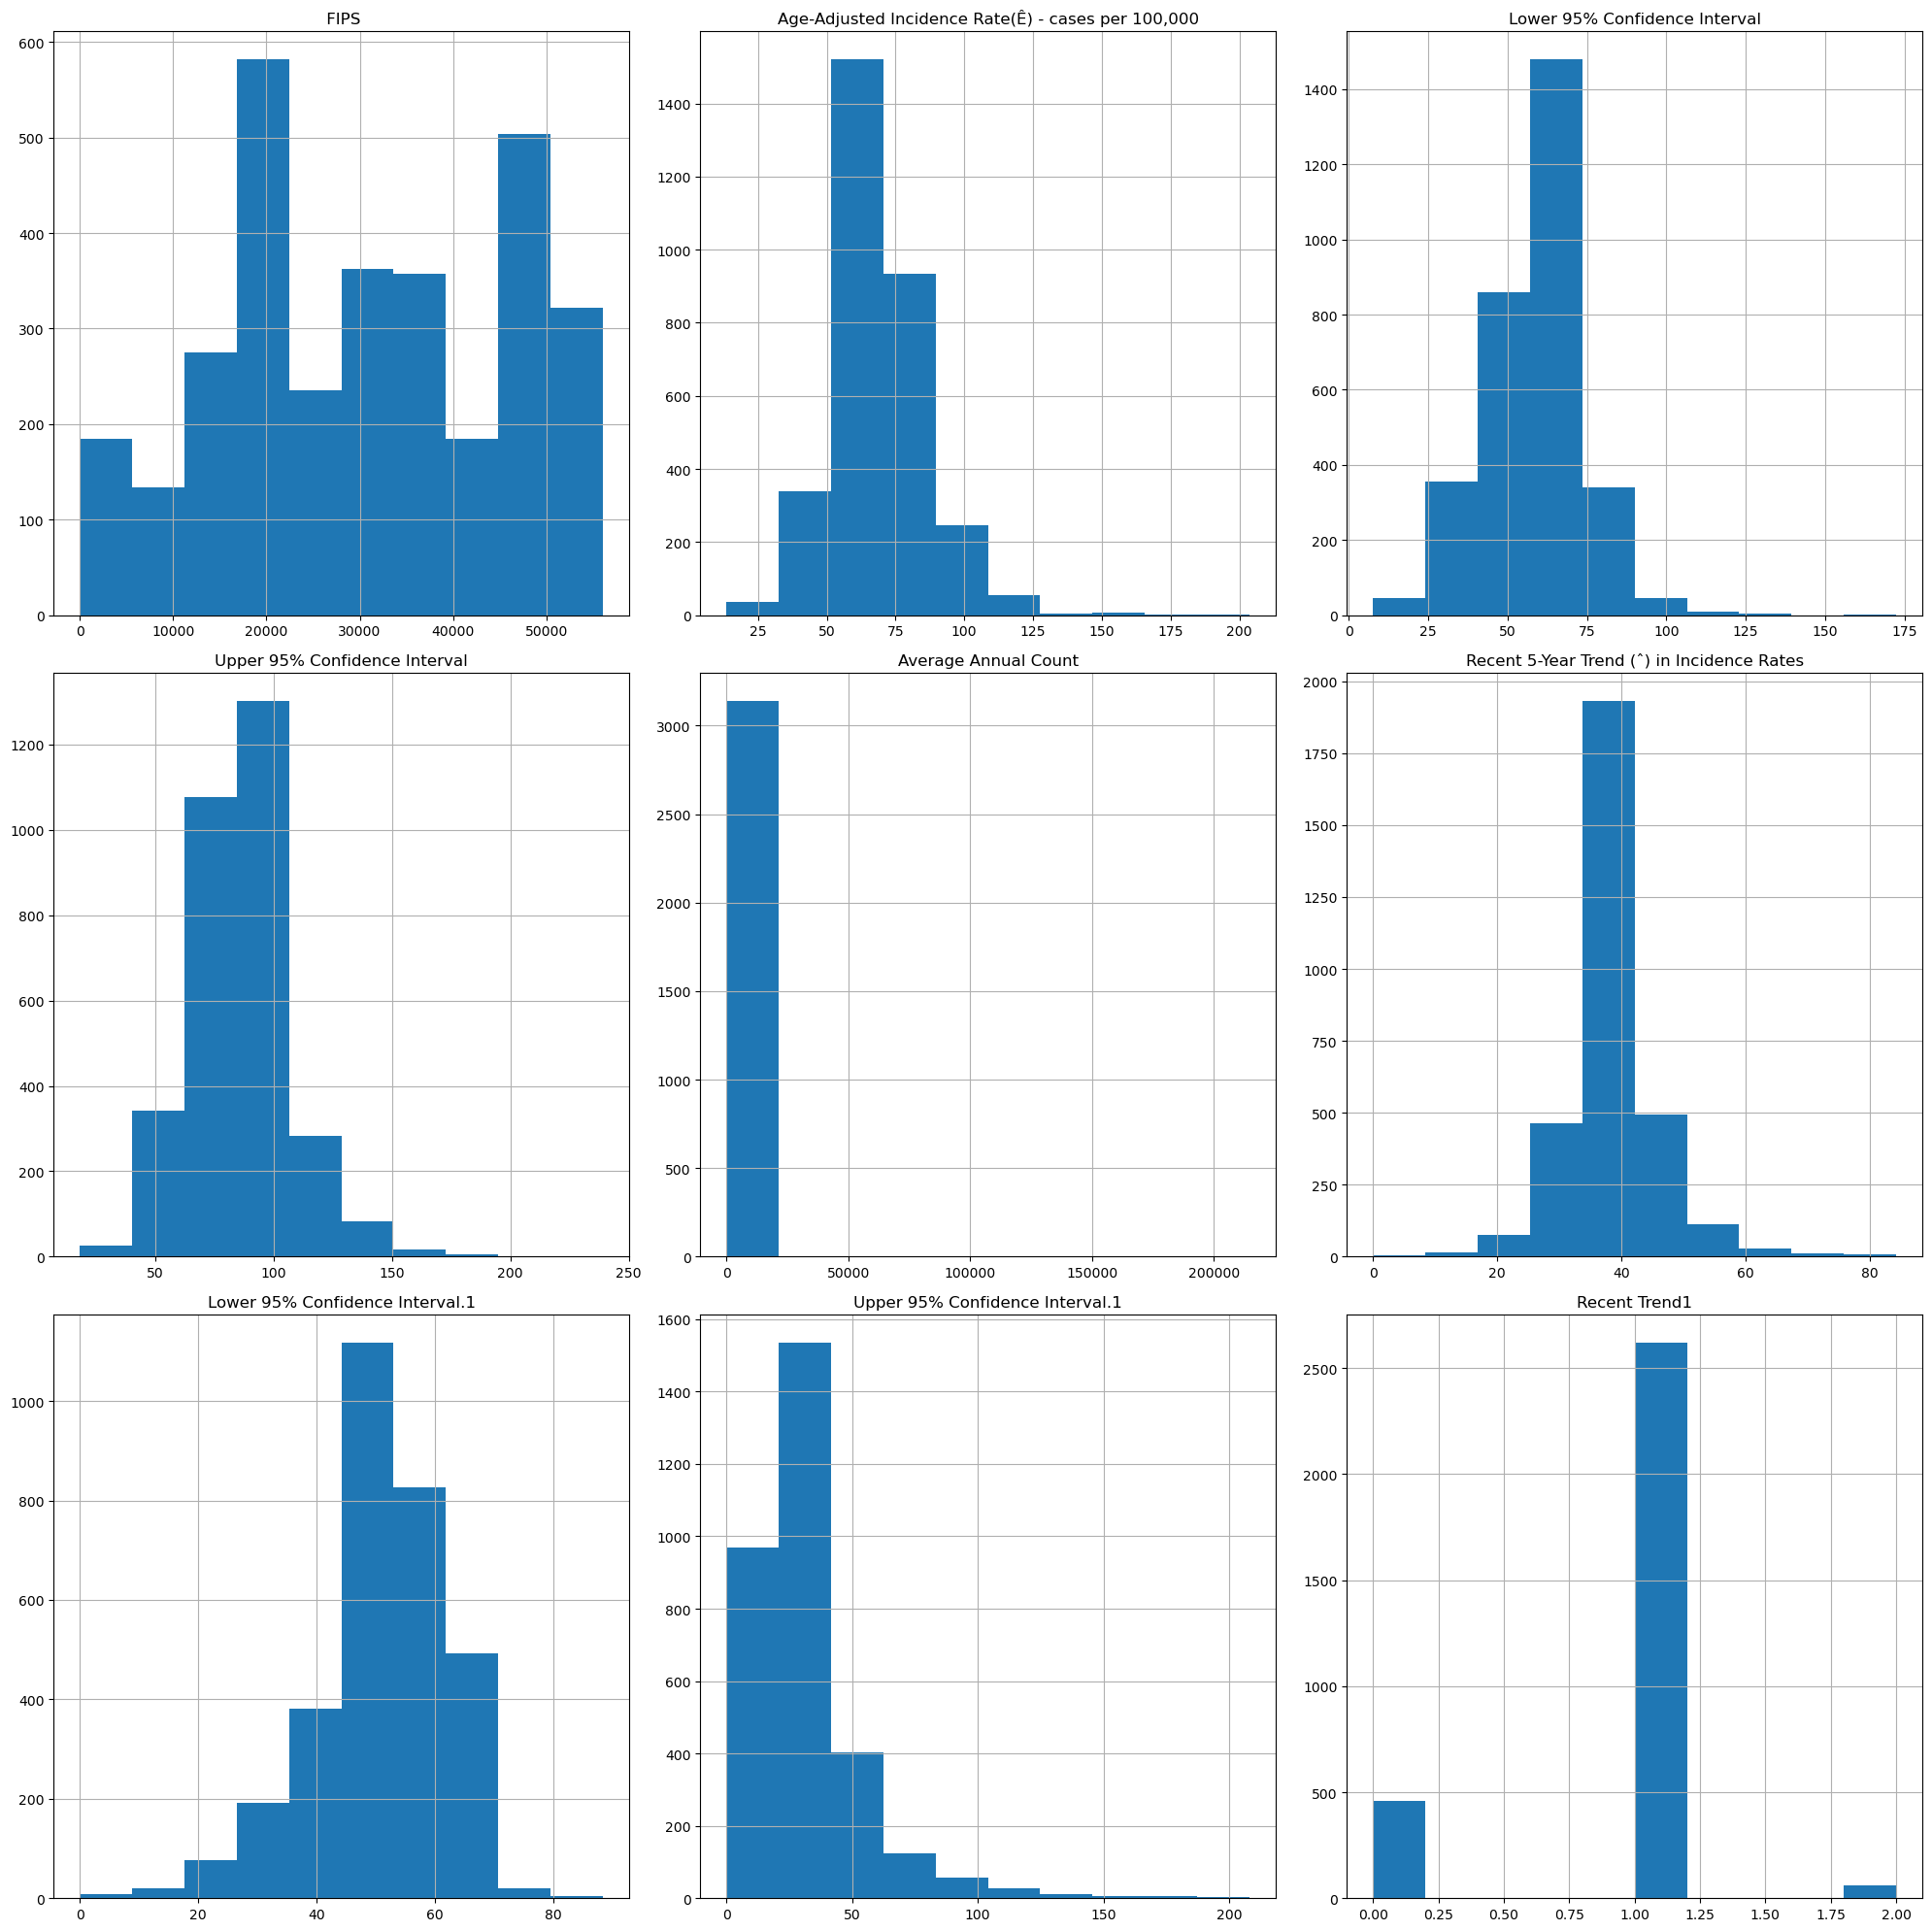

In [19]:
df.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

### 3.1.2) Box Plot

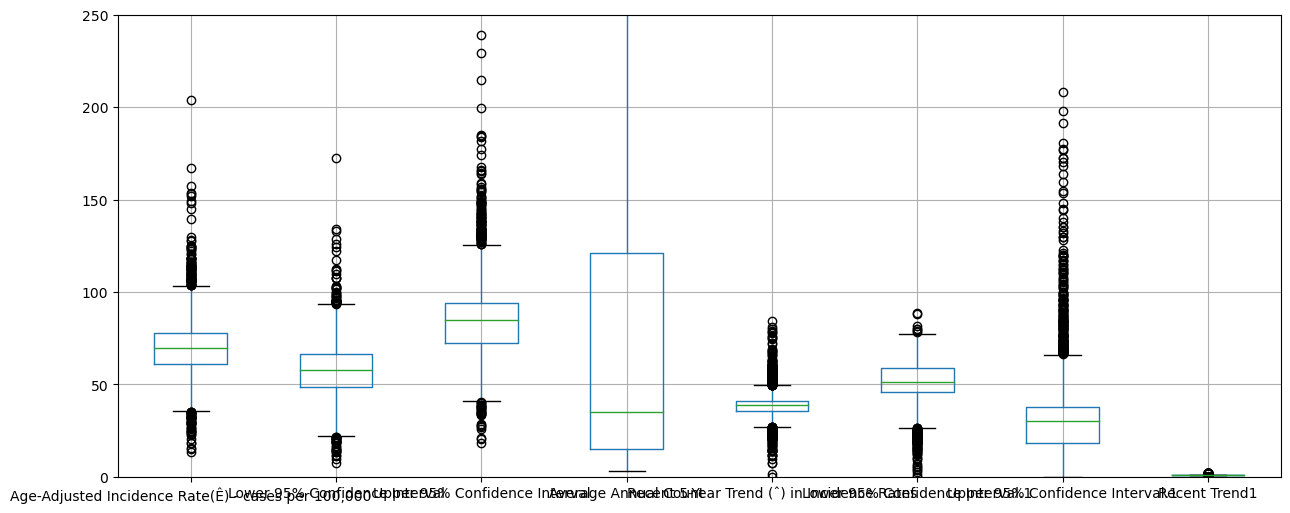

In [20]:
# Removing FIPS column for better analysis
nofips = df.iloc[:,2:]
plt.figure(figsize=(15, 6))
nofips.boxplot()
plt.ylim(0,250)
plt.show()

### 3.1.3) Bar Chart

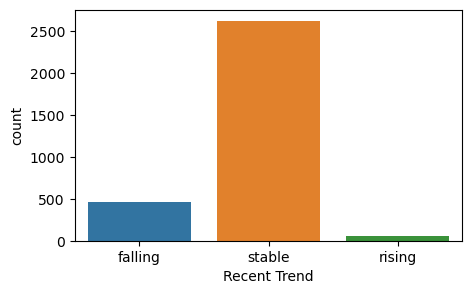

In [21]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Recent Trend', data=df)
plt.show()

### 3.1.4) Kernal Density Estimation

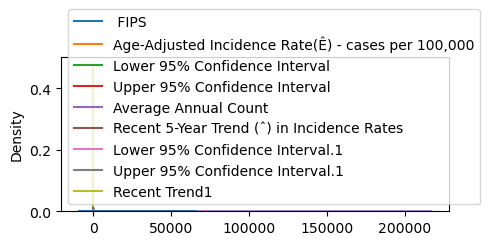

In [22]:
plt.figure(figsize=(5, 2))
sns.kdeplot(data=df)
plt.show()

## 3.2) Bivariate Analysis

### 3.2.1) Numerical vs Numerical

#### 3.2.1.1) Scatter Plot

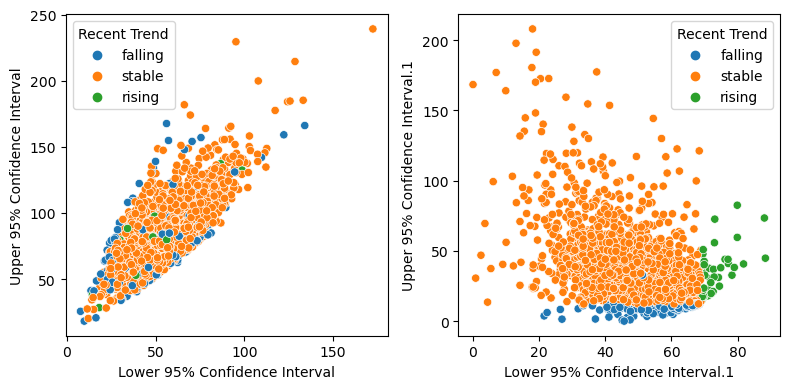

In [23]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.scatterplot(x='Lower 95% Confidence Interval', y='Upper 95% Confidence Interval', hue='Recent Trend', data=df)
plt.subplot(122)
sns.scatterplot(x='Lower 95% Confidence Interval.1', y='Upper 95% Confidence Interval.1', hue='Recent Trend', data=df)
plt.tight_layout()
plt.show()

#### 3.2.1.2) Correlation Coefficient

In [24]:
corr = df['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].corr(df['Recent Trend1'])
print("Correlation coefficient between Age-Adjusted Incidence Rate - cases per 100,000 and Trend:", corr)

Correlation coefficient between Age-Adjusted Incidence Rate - cases per 100,000 and Trend: 0.07079875278248046


### 3.2.2) Categorical vs Categorical

#### 3.2.2.1) Cross - Tabulation Table

In [25]:
ctab = pd.crosstab(df['County'], df['Recent Trend'])
ctab

Recent Trend,falling,rising,stable
County,,,
"Abbeville County, South Carolina(6,10)",0,1,0
"Acadia Parish, Louisiana(7,9)",0,0,1
"Accomack County, Virginia(6,10)",0,0,1
"Ada County, Idaho(6,10)",0,0,1
"Adair County, Iowa(7,8)",0,0,1
...,...,...,...
"Yuma County, Arizona(6,10)",0,0,1
"Yuma County, Colorado(6,10)",0,0,1
"Zapata County, Texas(6,10)",0,0,1


#### 3.2.2.2) Chi-Square Test of Independence

In [26]:
cont_table = pd.crosstab(df['County'], df['Recent Trend'])
chi2, p, dof, expected = chi2_contingency(cont_table)

print('Chi-square statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:\n', expected)

Chi-square statistic: 6282.0
P-value: 0.4905091221376504
Degrees of freedom: 6280
Expected frequencies:
 [[0.14645018 0.0191022  0.83444763]
 [0.14645018 0.0191022  0.83444763]
 [0.14645018 0.0191022  0.83444763]
 ...
 [0.14645018 0.0191022  0.83444763]
 [0.14645018 0.0191022  0.83444763]
 [0.14645018 0.0191022  0.83444763]]


#### 3.2.2.3) Stacked Bar Chart

<Figure size 1000x500 with 0 Axes>

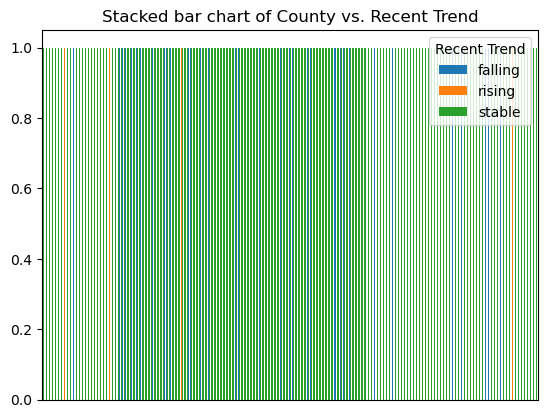

In [27]:
plt.figure(figsize=(10, 5))
ctab = pd.crosstab(df['County'], df['Recent Trend'], normalize='index')
ctab.plot(kind='bar', stacked=True).xaxis.set_visible(False)
plt.title("Stacked bar chart of County vs. Recent Trend")
plt.show()

### 3.2.3) Numerical vs Categorical

#### 3.2.3.1) Statistical Test: One-way ANOVA Test

In [28]:
falling = df[df["Recent Trend"] == "falling"]["Age-Adjusted Incidence Rate(Ê) - cases per 100,000"]
stable = df[df["Recent Trend"] == "stable"]["Age-Adjusted Incidence Rate(Ê) - cases per 100,000"]
rising = df[df["Recent Trend"] == "rising"]["Age-Adjusted Incidence Rate(Ê) - cases per 100,000"]
f_statistic, p_value = stats.f_oneway(falling, stable, rising)
print("f-statistic:", f_statistic)
print("p-value:", p_value)

f-statistic: 12.523382903522938
p-value: 3.8260870076888755e-06


#### 3.2.3.2) Stacked Bar Chart

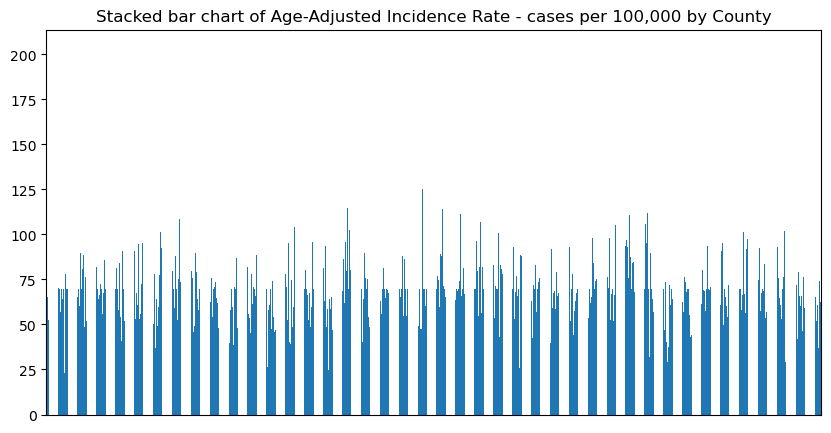

In [29]:
ncs = df.groupby('County')['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].sum()
ncs.plot(kind='bar',stacked=True,figsize=(10,5)).xaxis.set_visible(False)
plt.title("Stacked bar chart of Age-Adjusted Incidence Rate - cases per 100,000 by County")
plt.show()

### 3.2.4) Categorical vs Numerical

#### 3.2.4.1) Violin Plot

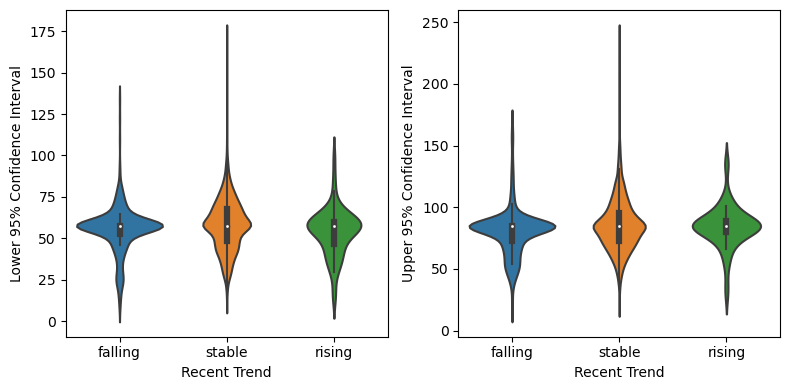

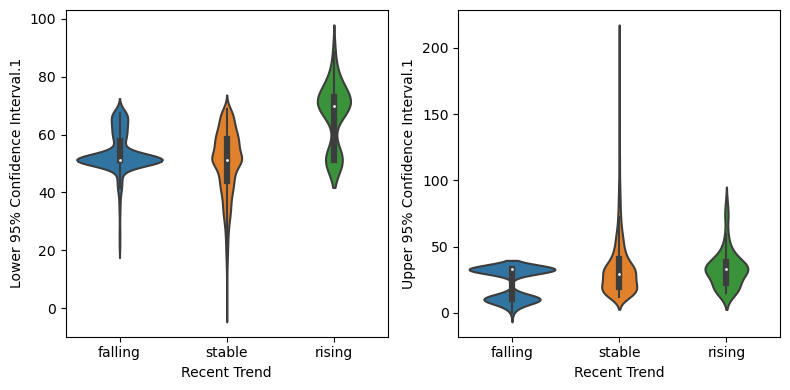

In [30]:
plt.figure(figsize=(8,4))
# Lower 95% Confidence Interval variable, grouped by Recent Trend
plt.subplot(121)
sns.violinplot(x="Recent Trend", y="Lower 95% Confidence Interval", data=df)
# Upper 95% Confidence Interval variable, grouped by Recent Trend
plt.subplot(122)
sns.violinplot(x="Recent Trend", y="Upper 95% Confidence Interval", data=df)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
# Lower 95% Confidence Interval.1 variable, grouped by Recent Trend
plt.subplot(121)
sns.violinplot(x="Recent Trend", y="Lower 95% Confidence Interval.1", data=df)
# Upper 95% Confidence Interval.1 variable, grouped by Recent Trend
plt.subplot(122)
sns.violinplot(x="Recent Trend", y="Upper 95% Confidence Interval.1", data=df)
plt.tight_layout()
plt.show()

#### 3.2.4.2) Strip Plot

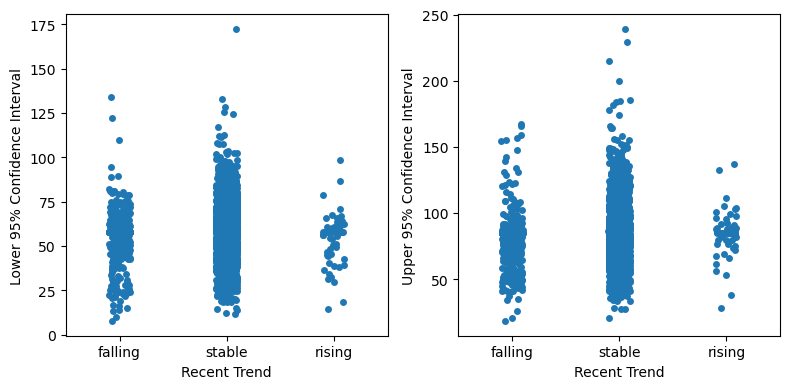

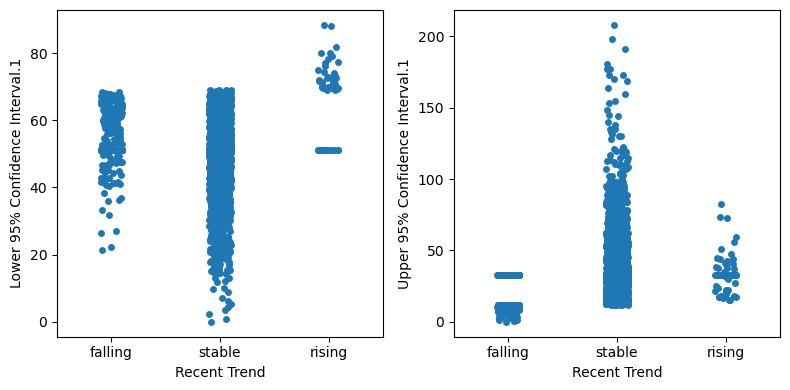

In [31]:
plt.figure(figsize=(8,4))
# Lower 95% Confidence Interval variable, grouped by Recent Trend
plt.subplot(121)
sns.stripplot(x="Recent Trend", y="Lower 95% Confidence Interval", data=df)
# Upper 95% Confidence Interval variable, grouped by Recent Trend
plt.subplot(122)
sns.stripplot(x="Recent Trend", y="Upper 95% Confidence Interval", data=df)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
# Lower 95% Confidence Interval.1 variable, grouped by Recent Trend
plt.subplot(121)
sns.stripplot(x="Recent Trend", y="Lower 95% Confidence Interval.1", data=df)
# Upper 95% Confidence Interval.1 variable, grouped by Recent Trend
plt.subplot(122)
sns.stripplot(x="Recent Trend", y="Upper 95% Confidence Interval.1", data=df)
plt.tight_layout()
plt.show()

## 3.3) Multivariate Analysis

### 3.3.1) Heatmap - Correlation Matrix

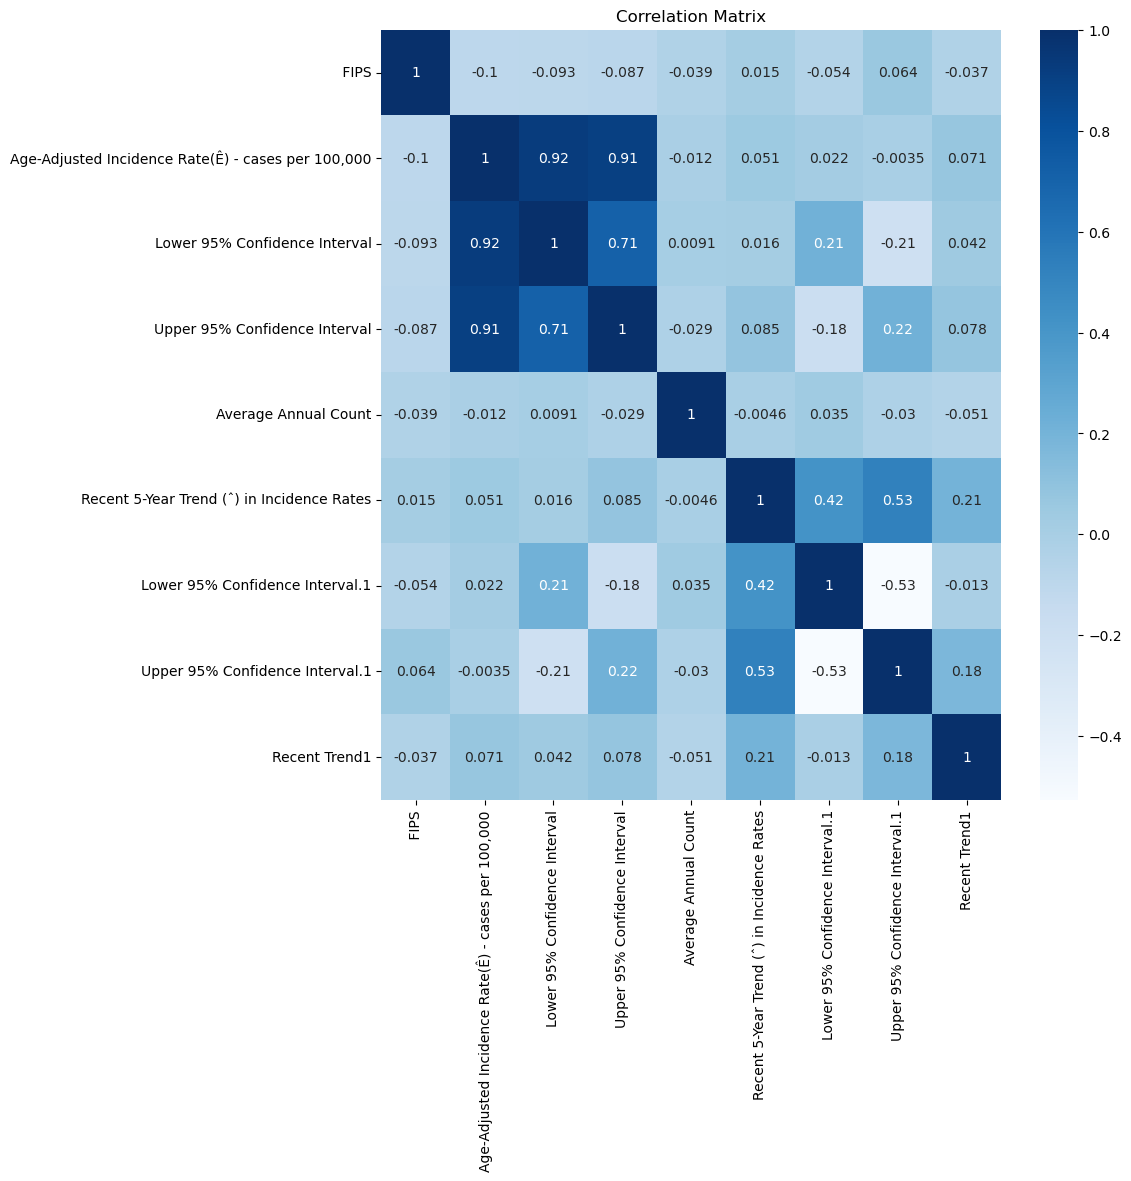

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title('Correlation Matrix')
plt.show()

### 3.3.2) Scatter Plot

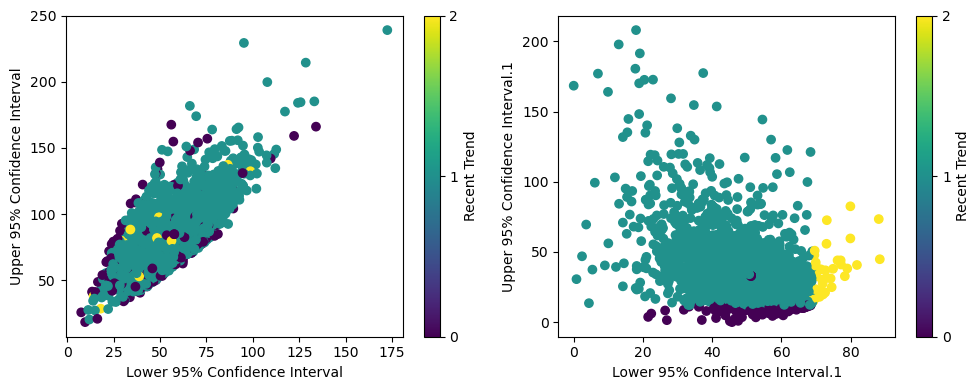

In [33]:
plt.figure(figsize=(10,4))
# Lower 95% Confidence Interval vs. Upper 95% Confidence Interval with color coded by Recent Trend
plt.subplot(121)
plt.scatter(df['Lower 95% Confidence Interval'], df['Upper 95% Confidence Interval'], c=df['Recent Trend'].map({'falling': 0, 'stable': 1, 'rising': 2}))
plt.xlabel('Lower 95% Confidence Interval')
plt.ylabel('Upper 95% Confidence Interval')
plt.colorbar(ticks=[0, 1, 2], label='Recent Trend')
# Lower 95% Confidence Interval.1 vs. Upper 95% Confidence Interval.1 with color coded by Recent Trend
plt.subplot(122)
plt.scatter(df['Lower 95% Confidence Interval.1'], df['Upper 95% Confidence Interval.1'], c=df['Recent Trend'].map({'falling': 0, 'stable': 1, 'rising': 2}))
plt.xlabel('Lower 95% Confidence Interval.1')
plt.ylabel('Upper 95% Confidence Interval.1')
plt.colorbar(ticks=[0, 1, 2], label='Recent Trend')
plt.tight_layout()
plt.show()

### 3.3.3) Scatter Plot Matrix

<Figure size 1600x500 with 0 Axes>

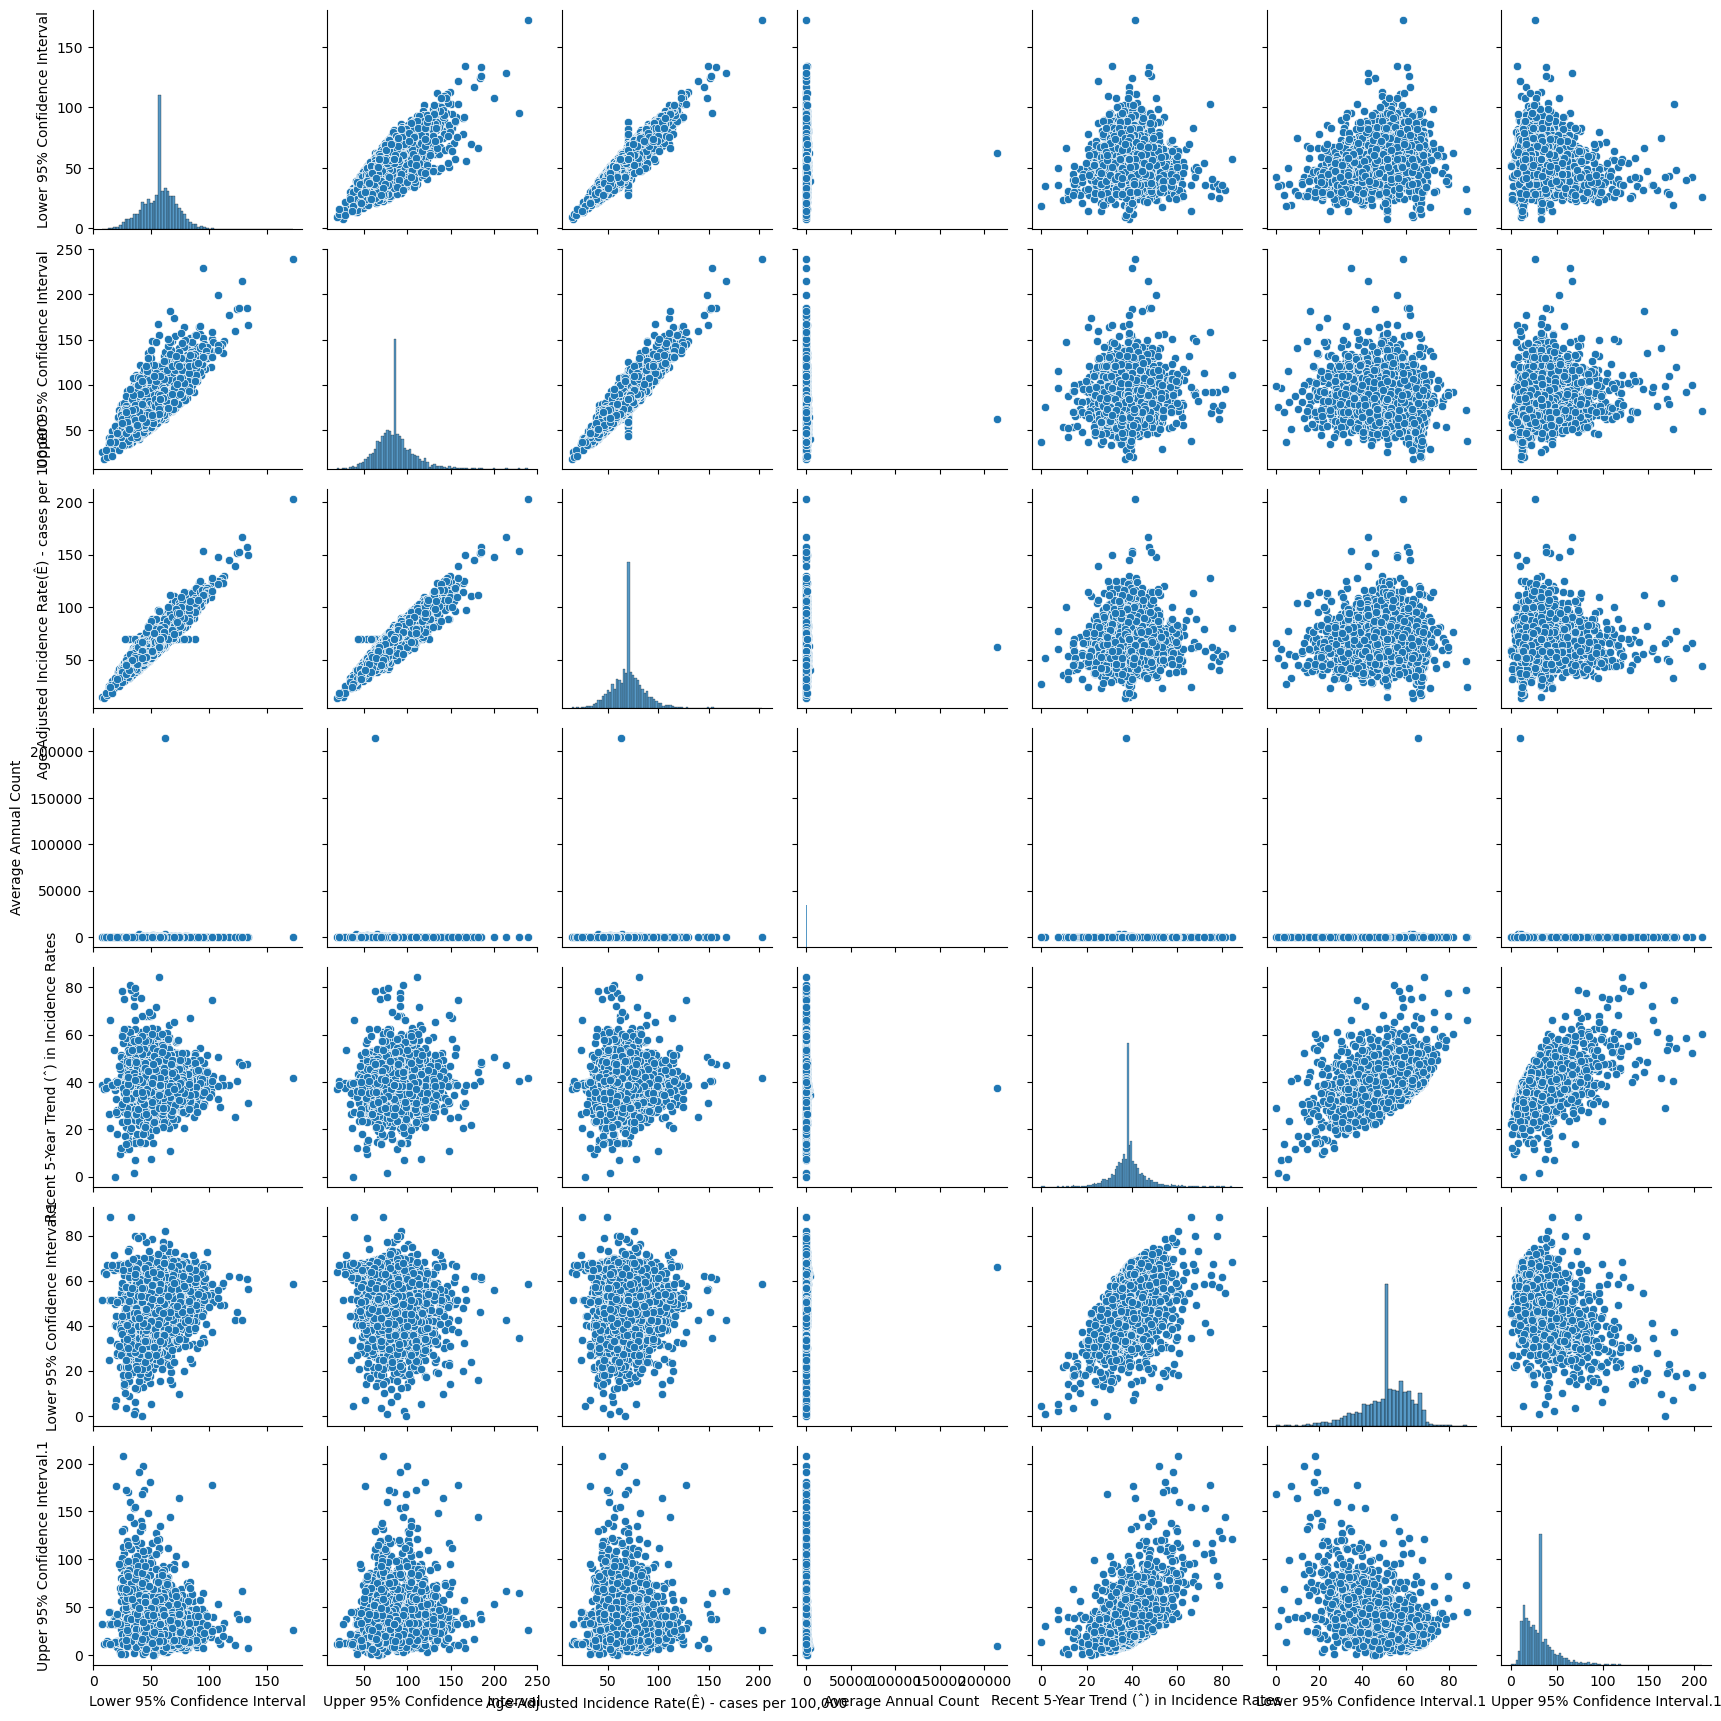

In [34]:
# Selecting numerical columns
num_vars = ['Lower 95% Confidence Interval','Upper 95% Confidence Interval','Age-Adjusted Incidence Rate(Ê) - cases per 100,000', 'Average Annual Count', 'Recent 5-Year Trend (ˆ) in Incidence Rates','Lower 95% Confidence Interval.1','Upper 95% Confidence Interval.1']

plt.figure(figsize=(16,5))
sns.pairplot(df[num_vars])
plt.show()

### 3.3.4) Factor Analysis

In [35]:
X = df[num_vars]
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(X)
print(fa.loadings_)

[[ 0.91054618 -0.18402275]
 [ 0.85845509  0.28880719]
 [ 1.01177564  0.05222917]
 [-0.00871315 -0.03901443]
 [ 0.04596465  0.29224439]
 [ 0.05629651 -0.40520562]
 [-0.05192348  1.03854902]]


## 3.4) Descriptive Analysis

### 3.4.1) Stats for Numerical Columns

In [36]:
df.describe()

,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Recent Trend1
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,30392.281757,69.939470,57.694226,84.786981,155.190879,38.638286,51.202208,32.807036,0.872652
std,15158.200839,16.475314,15.263744,20.909910,3831.472832,7.251884,11.211491,21.779930,0.386500
min,0.000000,13.500000,7.600000,18.300000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,18179.000000,60.800000,48.600000,72.600000,15.000000,35.400000,45.800000,18.400000,1.000000
50%,29177.000000,69.939470,57.694226,84.786981,35.000000,38.638286,51.202208,30.300000,1.000000
75%,45081.000000,77.900000,66.500000,93.800000,121.000000,41.100000,58.700000,37.600000,1.000000
max,56045.000000,203.700000,172.400000,239.100000,214614.000000,84.300000,88.400000,208.000000,2.000000


### 3.4.2) Stats for Categorical columns

In [37]:
print(df['County'].value_counts(),'\n')
print(df['Recent Trend'].value_counts(),'\n')

US (SEER+NPCR)(1,10)             1
Logan County, Ohio(6,10)         1
Lucas County, Ohio(6,10)         1
Madison County, Ohio(6,10)       1
Mahoning County, Ohio(6,10)      1
                                ..
Johnson County, Kentucky(7,9)    1
Kenton County, Kentucky(7,9)     1
Knott County, Kentucky(7,9)      1
Knox County, Kentucky(7,9)       1
Weston County, Wyoming(6,10)     1
Name: County, Length: 3141, dtype: int64 

stable     2621
falling     460
rising       60
Name: Recent Trend, dtype: int64 



### 3.4.3) Overall Stats

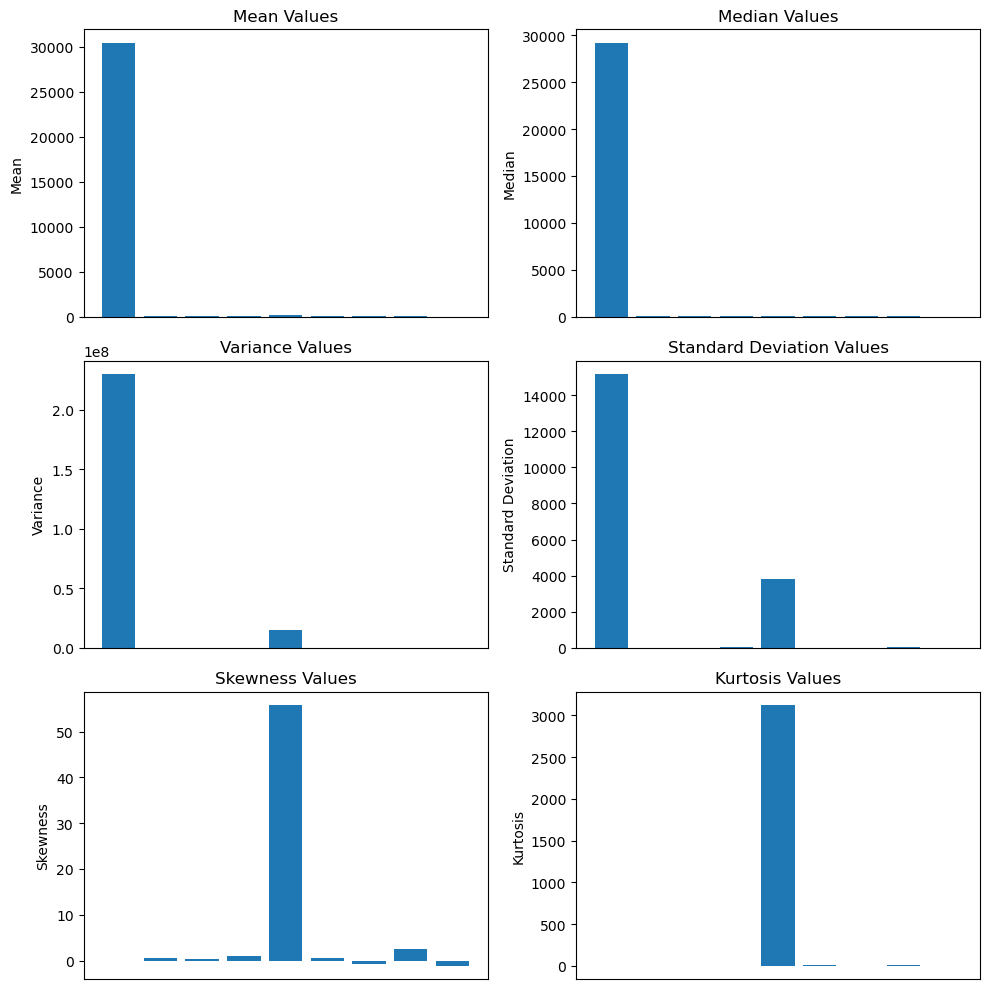

In [39]:
# Calculating variance, standard deviation, skewness, and kurtosis for each numerical variable
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
variance_values = df.var(numeric_only=True)
std_values = df.std(numeric_only=True)
skewness_values = df.skew(numeric_only=True)
kurtosis_values = df.kurtosis(numeric_only=True)

fig, axs = plt.subplots(3, 2, figsize=(10,10))

# Mean
axs[0, 0].bar(mean_values.index, mean_values.values)
axs[0, 0].set_ylabel('Mean')
axs[0, 0].set_title('Mean Values')
axs[0, 0].xaxis.set_visible(False)

# Median
axs[0, 1].bar(median_values.index, median_values.values)
axs[0, 1].set_ylabel('Median')
axs[0, 1].set_title('Median Values')
axs[0, 1].xaxis.set_visible(False)

# Variance
axs[1, 0].bar(variance_values.index, variance_values.values)
axs[1, 0].set_ylabel('Variance')
axs[1, 0].set_title('Variance Values')
axs[1, 0].xaxis.set_visible(False)

# Standard deviation
axs[1, 1].bar(std_values.index, std_values.values)
axs[1, 1].set_ylabel('Standard Deviation')
axs[1, 1].set_title('Standard Deviation Values')
axs[1, 1].xaxis.set_visible(False)

# Skewness 
axs[2, 0].bar(skewness_values.index, skewness_values.values)
axs[2, 0].set_ylabel('Skewness')
axs[2, 0].set_title('Skewness Values')
axs[2, 0].xaxis.set_visible(False)

# Kurtosis
axs[2, 1].bar(kurtosis_values.index, kurtosis_values.values)
axs[2, 1].set_ylabel('Kurtosis')
axs[2, 1].set_title('Kurtosis Values')
axs[2, 1].xaxis.set_visible(False)

plt.tight_layout()
plt.show()

### 3.4.4) Measures of Central Tendency

#### 3.4.4.1) Mean

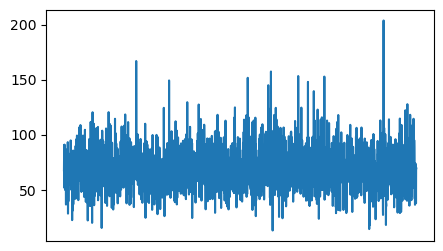

In [40]:
plt.figure(figsize=(5,3))
a = df.groupby('County')['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].mean()
a.plot().xaxis.set_visible(False)

#### 3.4.4.2) Median

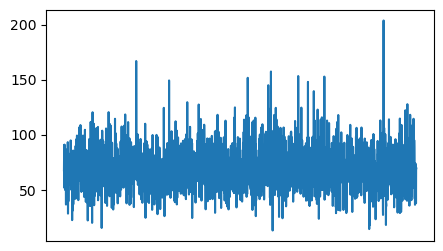

In [41]:
plt.figure(figsize=(5,3))
b = df.groupby('County')['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].median()
b.plot().xaxis.set_visible(False)

#### 3.4.4.3) Mode

In [42]:
df.mode()

,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Recent Trend1
0,"Abbeville County, South Carolina(6,10)",0,69.93947,57.694226,84.786981,155.190879,stable,38.638286,51.202208,32.807036,1.0
1,"Acadia Parish, Louisiana(7,9)",1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Accomack County, Virginia(6,10)",1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ada County, Idaho(6,10)",1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Adair County, Iowa(7,8)",1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3136,"Yuma County, Arizona(6,10)",56037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3137,"Yuma County, Colorado(6,10)",56039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3138,"Zapata County, Texas(6,10)",56041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3139,"Zavala County, Texas(6,10)",56043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.4.5) Measures of Dispersion

#### 3.4.5.1) Variance

In [43]:
df.var(numeric_only=True)

 FIPS                                                 2.297711e+08
Age-Adjusted Incidence Rate(Ê) - cases per 100,000    2.714360e+02
Lower 95% Confidence Interval                         2.329819e+02
Upper 95% Confidence Interval                         4.372244e+02
Average Annual Count                                  1.468018e+07
Recent 5-Year Trend (ˆ) in Incidence Rates            5.258982e+01
Lower 95% Confidence Interval.1                       1.256975e+02
Upper 95% Confidence Interval.1                       4.743654e+02
Recent Trend1                                         1.493824e-01
dtype: float64

#### 3.4.5.2) Range

In [44]:
num_col = df.select_dtypes(include='number')
r = num_col.max() - num_col.min()
r

 FIPS                                                  56045.0
Age-Adjusted Incidence Rate(Ê) - cases per 100,000       190.2
Lower 95% Confidence Interval                            164.8
Upper 95% Confidence Interval                            220.8
Average Annual Count                                  214611.0
Recent 5-Year Trend (ˆ) in Incidence Rates                84.3
Lower 95% Confidence Interval.1                           88.4
Upper 95% Confidence Interval.1                          208.0
Recent Trend1                                              2.0
dtype: float64

### 3.4.6) Measures of Shape and Skewness

#### 3.4.6.1) Skew

In [45]:
df.skew(numeric_only=True)

 FIPS                                                 -0.079776
Age-Adjusted Incidence Rate(Ê) - cases per 100,000     0.659159
Lower 95% Confidence Interval                          0.279102
Upper 95% Confidence Interval                          0.963586
Average Annual Count                                  55.883856
Recent 5-Year Trend (ˆ) in Incidence Rates             0.627448
Lower 95% Confidence Interval.1                       -0.829423
Upper 95% Confidence Interval.1                        2.623315
Recent Trend1                                         -1.182885
dtype: float64

#### 3.4.6.2) Kurtosis

In [46]:
df.kurtosis(numeric_only=True)

 FIPS                                                   -1.097491
Age-Adjusted Incidence Rate(Ê) - cases per 100,000       3.501202
Lower 95% Confidence Interval                            2.035791
Upper 95% Confidence Interval                            3.776066
Average Annual Count                                  3128.932827
Recent 5-Year Trend (ˆ) in Incidence Rates               5.130439
Lower 95% Confidence Interval.1                          1.245339
Upper 95% Confidence Interval.1                         11.057830
Recent Trend1                                            2.207112
dtype: float64

### 3.4.7) Percentile

In [47]:
df.quantile([0.25,0.5,0.75], numeric_only=True)

,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Recent Trend1
0.25,18179.0,60.80000,48.600000,72.600000,15.0,35.400000,45.800000,18.4,1.0
0.50,29177.0,69.93947,57.694226,84.786981,35.0,38.638286,51.202208,30.3,1.0
0.75,45081.0,77.90000,66.500000,93.800000,121.0,41.100000,58.700000,37.6,1.0


# 4) Data Pre-processing

## 4.1) Handling Outliers

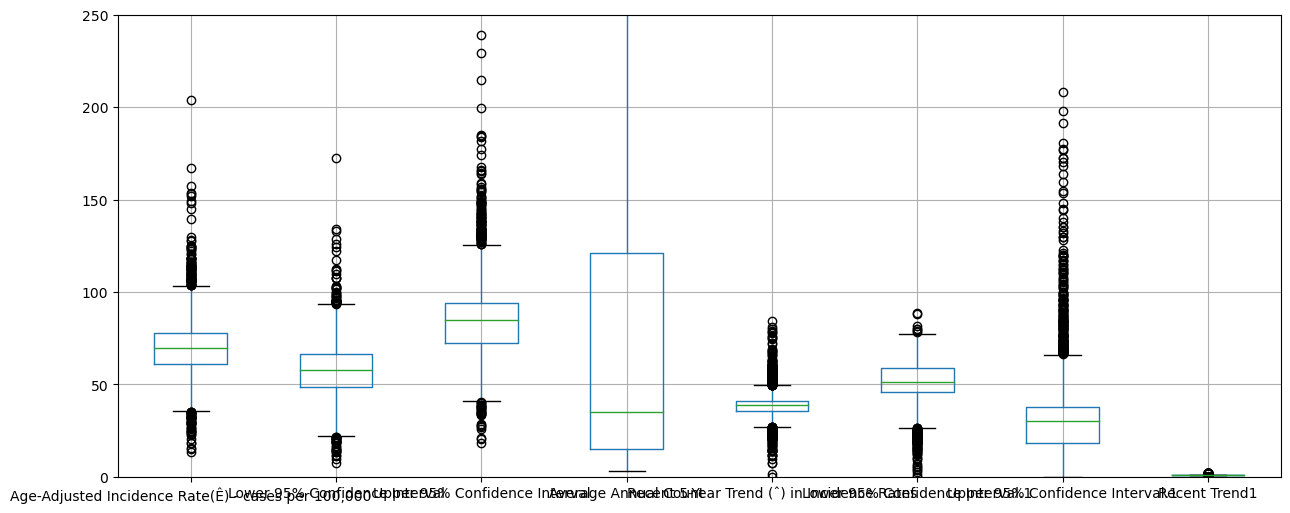

In [48]:
# Remove FIPS for better Analysis
nofips = df.iloc[:,2:]
plt.figure(figsize=(15, 6))
nofips.boxplot()
plt.ylim(0,250)
plt.show()

In [49]:
for i in num_vars:
    df[i]= winsorize(df[i],limits=[0.1,0.1])

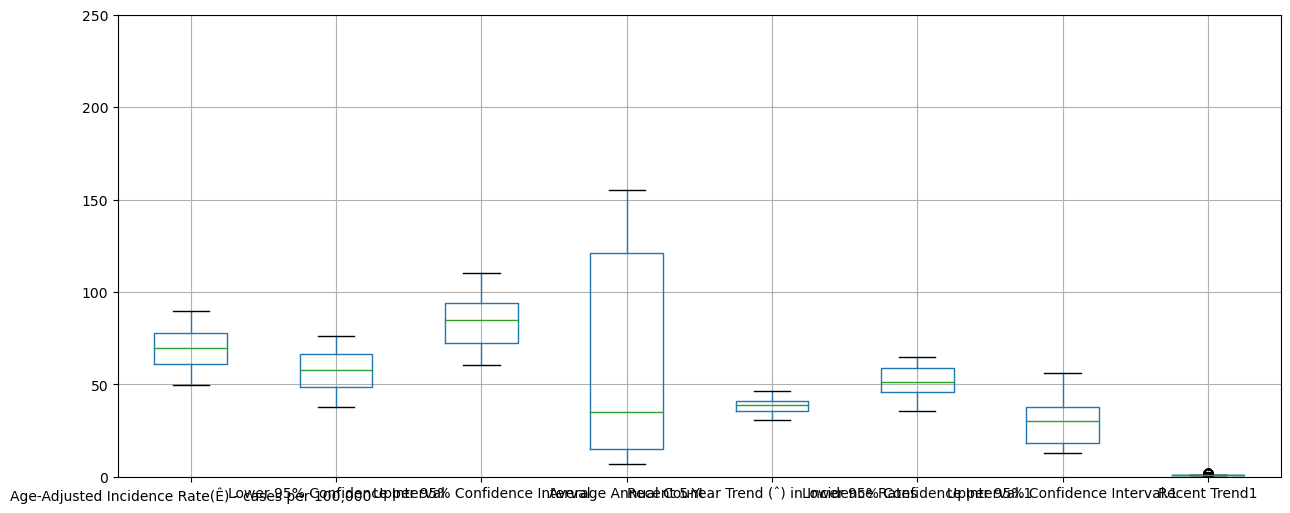

In [50]:
nofips = df.iloc[:,2:]
plt.figure(figsize=(15, 6))
nofips.boxplot()
plt.ylim(0,250)
plt.show()

## 4.2) Splitting Dataset

### 4.2.1) Independent Variables

In [51]:
X = df.drop(['Recent Trend1','County','Recent Trend'], axis=1)
X

,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,62.4,62.3,62.6,155.190879,37.6,64.8,13.1
1,1001,74.9,65.1,85.7,43.000000,40.6,54.1,30.7
2,1003,66.9,62.4,71.7,155.190879,43.1,58.8,30.4
3,1005,74.6,61.8,89.4,25.000000,33.7,50.7,19.4
4,1007,86.4,71.0,104.2,23.000000,35.6,37.6,45.0
...,...,...,...,...,...,...,...,...
3136,56037,49.4,38.0,60.5,14.000000,46.4,50.9,56.3
3137,56039,49.4,38.0,60.5,7.000000,30.9,35.8,13.1
3138,56041,49.4,38.0,60.5,7.000000,40.0,50.7,34.1
3139,56043,50.0,38.0,72.2,7.000000,46.4,56.8,56.3


### 4.2.2) Dependent variable

In [52]:
y = df['Recent Trend1']
y

0       0
1       1
2       1
3       1
4       1
       ..
3136    1
3137    1
3138    1
3139    1
3140    1
Name: Recent Trend1, Length: 3141, dtype: int64

## 4.3) Handling Imbalanced Data

### 4.3.1)  SMOTE (Synthetic Minority Over-sampling Technique)

In [53]:
sm=SMOTE(random_state=2) 
X_res, y_res = sm.fit_resample (X, y)

In [54]:
X_res

,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,62.400000,62.300000,62.600000,155.190879,37.600000,64.800000,13.100000
1,1001,74.900000,65.100000,85.700000,43.000000,40.600000,54.100000,30.700000
2,1003,66.900000,62.400000,71.700000,155.190879,43.100000,58.800000,30.400000
3,1005,74.600000,61.800000,89.400000,25.000000,33.700000,50.700000,19.400000
4,1007,86.400000,71.000000,104.200000,23.000000,35.600000,37.600000,45.000000
...,...,...,...,...,...,...,...,...
7858,32027,69.939470,57.694226,84.786981,155.190879,38.638286,51.202208,32.807036
7859,53055,79.943380,67.742814,97.460506,33.771407,46.400000,64.800000,29.708563
7860,47385,58.395448,47.392431,71.573342,20.376853,46.287438,64.800000,35.500547
7861,29095,55.727802,39.276057,77.331290,7.741278,46.400000,64.800000,33.123588


In [55]:
y_res

0       0
1       1
2       1
3       1
4       1
       ..
7858    2
7859    2
7860    2
7861    2
7862    2
Name: Recent Trend1, Length: 7863, dtype: int64

## 4.4) Splitting into Train and Test

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [57]:
X_train

,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
7156,19043,69.708795,50.418779,94.485895,9.000000,43.187084,64.800000,17.387084
3490,30022,69.939470,57.694226,84.786981,155.190879,38.638286,51.202208,32.807036
4832,17059,87.943329,62.384548,110.275428,9.029072,30.900000,48.694783,13.100000
6730,44601,68.266029,55.259171,84.158372,21.786285,45.279864,64.800000,25.483451
6777,36368,69.670249,62.311789,77.801872,67.878641,43.213419,64.800000,17.626838
...,...,...,...,...,...,...,...,...
4931,31087,69.939470,57.694226,84.786981,155.190879,38.638286,51.202208,32.807036
3264,26016,70.456078,66.748150,88.692084,46.803291,32.161561,56.799048,13.100000
1653,31001,62.700000,51.700000,75.400000,24.000000,46.400000,56.700000,42.800000
2607,48171,49.400000,40.400000,60.500000,25.000000,30.900000,37.900000,22.700000


In [58]:
X_test

,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
1817,35043,49.400000,38.000000,60.500000,58.000000,38.900000,64.800000,13.100000
6459,19117,62.773932,45.882621,84.833726,9.385862,42.945655,64.800000,17.107069
7330,29023,77.747879,65.767685,91.584678,35.103759,43.473115,64.800000,20.180435
6135,29071,78.943883,62.562394,99.095585,21.708511,45.099681,64.800000,30.083351
7186,52998,74.354115,60.129175,93.924514,23.547819,46.400000,64.800000,45.794372
...,...,...,...,...,...,...,...,...
5786,12682,74.160227,61.587049,87.421344,32.671475,46.091269,64.800000,28.029339
2359,45089,66.300000,55.800000,78.400000,29.000000,46.000000,64.800000,23.500000
3464,6064,49.400000,44.781709,60.500000,155.190879,34.627204,60.481709,13.100000
1173,22123,78.500000,59.500000,102.000000,12.000000,34.700000,44.300000,30.900000


In [59]:
y_train

7156    2
3490    0
4832    0
6730    2
6777    2
       ..
4931    0
3264    0
1653    1
2607    1
2732    0
Name: Recent Trend1, Length: 6290, dtype: int64

In [60]:
y_test

1817    1
6459    2
7330    2
6135    2
7186    2
       ..
5786    2
2359    2
3464    0
1173    1
2894    1
Name: Recent Trend1, Length: 1573, dtype: int64

# 5) Model Building

## 5.1) Training the model in multiple algorithms and Performance Testing

### 5.1.1) Random Forest Classifier

In [64]:
rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 2, 2, ..., 0, 1, 0], dtype=int64)

In [66]:
print("Classification Report\n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

print("\nTrain score:", rfc.score (X_train, y_train), "\nTest score:",rfc.score (X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       518
           1       0.97      0.96      0.97       521
           2       0.99      0.99      0.99       534

    accuracy                           0.98      1573
   macro avg       0.98      0.98      0.98      1573
weighted avg       0.98      0.98      0.98      1573

Confusion Matrix
 [[506  12   0]
 [ 13 502   6]
 [  0   3 531]]

Train score: 1.0 
Test score: 0.9783852511125238


### 5.1.2) Decision Tree Classifer

In [67]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [68]:
y_pred = dtc.predict(X_test)
y_pred

array([0, 2, 2, ..., 0, 1, 0], dtype=int64)

In [69]:
print("Classification Report\n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

print("\nTrain score:", dtc.score (X_train, y_train), "\nTest score:",dtc.score (X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       518
           1       0.93      0.93      0.93       521
           2       0.98      0.99      0.98       534

    accuracy                           0.95      1573
   macro avg       0.95      0.95      0.95      1573
weighted avg       0.95      0.95      0.95      1573

Confusion Matrix
 [[491  27   0]
 [ 29 483   9]
 [  0   8 526]]

Train score: 1.0 
Test score: 0.9535918626827717


### 5.1.3) Gradient Boosting Classifier

In [70]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [71]:
y_pred = gbc.predict(X_test)
y_pred

array([0, 2, 2, ..., 0, 1, 0], dtype=int64)

In [72]:
print("Classification Report\n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

print("\nTrain score:", gbc.score (X_train, y_train), "\nTest score:",gbc.score (X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       518
           1       0.95      0.95      0.95       521
           2       0.99      1.00      0.99       534

    accuracy                           0.97      1573
   macro avg       0.97      0.97      0.97      1573
weighted avg       0.97      0.97      0.97      1573

Confusion Matrix
 [[495  23   0]
 [ 17 496   8]
 [  0   1 533]]

Train score: 0.9774244833068363 
Test score: 0.9688493324856962


### 5.1.4) Ada Boost Classifier

In [73]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [74]:
y_pred = abc.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [75]:
print("Classification Report\n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

print("\nTrain score:", abc.score (X_train, y_train), "\nTest score:",abc.score (X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       518
           1       0.47      0.79      0.59       521
           2       1.00      0.29      0.45       534

    accuracy                           0.64      1573
   macro avg       0.76      0.64      0.62      1573
weighted avg       0.76      0.64      0.62      1573

Confusion Matrix
 [[442  76   0]
 [111 410   0]
 [  0 379 155]]

Train score: 0.6518282988871225 
Test score: 0.6401780038143674


### 5.1.5) K Nearest Neighbors Classifier

In [76]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
y_pred = knn.predict(X_test)
y_pred

array([1, 2, 2, ..., 0, 1, 0], dtype=int64)

In [79]:
print("Classification Report\n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

print("\nTrain score:", knn.score (X_train, y_train), "\nTest score:",knn.score (X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       518
           1       0.85      0.75      0.80       521
           2       0.91      0.92      0.91       534

    accuracy                           0.86      1573
   macro avg       0.86      0.86      0.85      1573
weighted avg       0.86      0.86      0.85      1573

Confusion Matrix
 [[463  45  10]
 [ 90 392  39]
 [ 17  26 491]]

Train score: 0.9052464228934817 
Test score: 0.8556897647806738


### 5.1.6) Logistic Regression

In [80]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [81]:
y_pred = lr.predict(X_test)
y_pred

array([2, 2, 1, ..., 2, 1, 0], dtype=int64)

In [82]:
print("Classification Report\n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

print("\nTrain score:", lr.score (X_train, y_train), "\nTest score:",lr.score (X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.58      0.72      0.64       518
           1       0.74      0.57      0.64       521
           2       0.62      0.62      0.62       534

    accuracy                           0.63      1573
   macro avg       0.65      0.63      0.63      1573
weighted avg       0.65      0.63      0.63      1573

Confusion Matrix
 [[371  59  88]
 [113 298 110]
 [157  48 329]]

Train score: 0.624006359300477 
Test score: 0.6344564526382708


### 5.1.7) Support Vector Machines

In [83]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [84]:
y_pred = svm.predict(X_test)
y_pred

array([2, 1, 2, ..., 0, 2, 0], dtype=int64)

In [85]:
print("Classification Report\n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

print("\nTrain score:", svm.score (X_train, y_train), "\nTest score:",svm.score (X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.47      0.56      0.51       518
           1       0.36      0.23      0.28       521
           2       0.49      0.56      0.52       534

    accuracy                           0.45      1573
   macro avg       0.44      0.45      0.44      1573
weighted avg       0.44      0.45      0.44      1573

Confusion Matrix
 [[291  86 141]
 [227 122 172]
 [101 133 300]]

Train score: 0.45961844197138313 
Test score: 0.4532739987285442


### 5.1.8) Gaussian Naive Bayes Classifier

In [86]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [87]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 2, 2, ..., 0, 1, 0], dtype=int64)

In [89]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Classification Report\n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

print("\nTrain score:", gnb.score (X_train, y_train), "\nTest score:",gnb.score (X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.57      0.80      0.67       518
           1       0.67      0.54      0.60       521
           2       0.82      0.66      0.73       534

    accuracy                           0.67      1573
   macro avg       0.69      0.67      0.67      1573
weighted avg       0.69      0.67      0.67      1573

Confusion Matrix
 [[414 104   0]
 [160 283  78]
 [146  33 355]]

Train score: 0.6686804451510334 
Test score: 0.6687857596948507


### 5.1.9) XGBoost Classifier

In [90]:
xb = xgb.XGBClassifier()
xb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [91]:
y_pred = xb.predict(X_test)
y_pred

array([0, 2, 2, ..., 0, 1, 0], dtype=int64)

In [92]:
print("Classification Report\n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

print("\nTrain score:", xb.score (X_train, y_train), "\nTest score:",xb.score (X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       518
           1       0.98      0.97      0.97       521
           2       0.99      1.00      0.99       534

    accuracy                           0.98      1573
   macro avg       0.98      0.98      0.98      1573
weighted avg       0.98      0.98      0.98      1573

Confusion Matrix
 [[509   9   0]
 [ 11 504   6]
 [  0   0 534]]

Train score: 1.0 
Test score: 0.9834710743801653


## 5.2) Hyperparameter Tuning

### 5.2.1) Cross Validation Score before Hyper Parameter Tuning

In [94]:
rfc_s = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')
dtc_s = cross_val_score(dtc, X, y, cv=5, scoring='accuracy')
gbc_s = cross_val_score(gbc, X, y, cv=5, scoring='accuracy')
abc_s = cross_val_score(abc, X, y, cv=5, scoring='accuracy')
knn_s = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
lr_s =  cross_val_score( lr, X, y, cv=5, scoring='accuracy')
svm_s = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
gnb_s = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
xb_s = cross_val_score(xb, X, y, cv=5, scoring='accuracy')
# Print the average accuracy and standard deviation of the scores
print("Accuracy of Random Forest Classifier       : %0.2f (+/- %0.2f)" % (rfc_s.mean(), rfc_s.std() * 2))
print("Accuracy of Decision Tree Classifier       : %0.2f (+/- %0.2f)" % (dtc_s.mean(), dtc_s.std() * 2))
print("Accuracy of Gradient Boosting Classifier   : %0.2f (+/- %0.2f)" % (gbc_s.mean(), gbc_s.std() * 2))
print("Accuracy of Ada Boost Classifier           : %0.2f (+/- %0.2f)" % (abc_s.mean(), abc_s.std() * 2))
print("Accuracy of K Nearest Neighbours           : %0.2f (+/- %0.2f)" % (knn_s.mean(), knn_s.std() * 2))
print("Accuracy of Logistic Regression            : %0.2f (+/- %0.2f)" % ( lr_s.mean(),  lr_s.std() * 2))
print("Accuracy of Support Vector Machines        : %0.2f (+/- %0.2f)" % (svm_s.mean(), svm_s.std() * 2))
print("Accuracy of Gaussian Naive Bayes Classifier: %0.2f (+/- %0.2f)" % (gnb_s.mean(), gnb_s.std() * 2))
print("Accuracy of XGBoost Classifier             : %0.2f (+/- %0.2f)" % (xb_s.mean(), xb_s.std() * 2))

Accuracy of Random Forest Classifier       : 0.92 (+/- 0.11)
Accuracy of Decision Tree Classifier       : 0.63 (+/- 0.66)
Accuracy of Gradient Boosting Classifier   : 0.78 (+/- 0.46)
Accuracy of Ada Boost Classifier           : 0.71 (+/- 0.30)
Accuracy of K Nearest Neighbours           : 0.19 (+/- 0.04)
Accuracy of Logistic Regression            : 0.85 (+/- 0.06)
Accuracy of Support Vector Machines        : 0.83 (+/- 0.00)
Accuracy of Gaussian Naive Bayes Classifier: 0.77 (+/- 0.09)
Accuracy of XGBoost Classifier             : 0.90 (+/- 0.13)


### 5.2.2) Performing Hyperparameter Tuning for Two Best Models

#### 5.2.2.1) Random Forest Classifier

In [96]:
params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_iter=10, scoring='accuracy', random_state=42)
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [97]:
rfc_best_model = rfc_cv.best_estimator_
rfc_best_model

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [98]:
predictions = rfc_best_model.predict(X)
predictions

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [99]:
print("Classification Report:\n")
print(classification_report(y, predictions))
print("\nBest Hyperparameters: ", rfc_cv.best_params_)
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, rfc_cv.predict(X_test)) * 100.0))
print("Best Score: %.2f%%" % (rfc_cv.best_score_ * 100.0))

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       460
           1       1.00      0.98      0.99      2621
           2       0.73      0.97      0.83        60

    accuracy                           0.98      3141
   macro avg       0.88      0.98      0.93      3141
weighted avg       0.98      0.98      0.98      3141


Best Hyperparameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}

Accuracy Score: 97.52%
Best Score: 96.53%


#### 5.2.2.2) XGBoost Classifier

In [100]:
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}
xb_cv = RandomizedSearchCV(xb, param_distributions=params, n_iter=10, cv=5, verbose=3, random_state=42)
xb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.901 total time=   1.5s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.901 total time=   1.3s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.910 total time=   1.2s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.930 total time=   1.2s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.917 total time=   1.2s
[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate

[CV 3/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.964 total time=   0.5s
[CV 4/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.980 total time=   0.5s
[CV 5/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.971 total time=   0.5s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, verbose=3)

In [101]:
xb_best_model = xb_cv.best_estimator_
xb_best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [102]:
predictions = xb_best_model.predict(X)
predictions

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [103]:
print("Classification Report:\n")
print(classification_report(y, predictions))
print("\nBest Hyperparameters: ", xb_cv.best_params_)
print("Accuracy Score: %.2f%%" % (accuracy_score(y_test, xb_cv.predict(X_test)) * 100.0))
print("Best Score: %.2f%%" % (xb_cv.best_score_ * 100.0))

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       460
           1       1.00      0.99      1.00      2621
           2       0.92      0.98      0.95        60

    accuracy                           0.99      3141
   macro avg       0.96      0.99      0.98      3141
weighted avg       0.99      0.99      0.99      3141


Best Hyperparameters:  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Accuracy Score: 98.22%
Best Score: 97.31%


### 5.2.3) Cross Validation Score after Hyper Parameter Tuning

In [105]:
rfc_cv_s = cross_val_score(rfc_cv, X, y, cv=5, scoring='accuracy')
xb_cv_s = cross_val_score(xb_cv, X, y, cv=5, scoring='accuracy')
# Print the average accuracy and standard deviation of the scores
print("Accuracy of Random Forest Classifier       : %0.2f (+/- %0.2f)" % (rfc_cv_s.mean(), rfc_cv_s.std() * 2))
print("Accuracy of XGBoost Classifier             : %0.2f (+/- %0.2f)" % (xb_cv_s.mean(), xb_cv_s.std() * 2))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.841 total time=   0.4s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.827 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.942 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.942 total time=   0.3s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.942 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate

[CV 3/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.924 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.960 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.958 total time=   0.2s
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.905 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.755 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=

[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.942 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.934 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.712 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.928 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.958 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.9

[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.751 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.879 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.942 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.948 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.944 total time=   0.3s
[CV 2/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, sco

[CV 4/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.944 total time=   0.5s
[CV 5/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.954 total time=   0.5s
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.201 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.867 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.855 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample

[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.948 total time=   0.5s
[CV 2/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.859 total time=   0.5s
[CV 3/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.728 total time=   0.5s
[CV 4/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.936 total time=   0.4s
[CV 5/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.956 total time=   0.5s
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, 

# Metric for best Model - XGBoost Classifier 

## Before Hyperparameter Tuning

In [93]:
print("Regression Metrics:")
print("Mean Squared Error (MSE)      :",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",mean_squared_error(y_test,y_pred, squared=False))
print("Mean Absolute Error (MAE)     :",mean_absolute_error(y_test,y_pred))
print("R-squared Score (R2)          :",r2_score(y_test,y_pred))

print("\nClassification Report:\n",classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

print("\nTrain score:", xb.score (X_train, y_train), "\nTest score:",xb.score (X_test, y_test))

print("\nCross Validation Score:")
xb_s = cross_val_score(xb, X, y, cv=5, scoring='accuracy')
print("Accuracy of XGBoost Classifier: %0.2f (+/- %0.2f)" % (xb_s.mean(), xb_s.std() * 2))
print("Accuracy Score : %.5f%%" % (accuracy_score(y_test, xb.predict(X_test)) * 100.0))
print("Precision Score: %.4f%%" % (precision_score(y_test, xb.predict(X_test), average='weighted') * 100.0))
print("Recall Score   : %0.3f%%" % (recall_score(y_test, xb.predict(X_test), average='weighted')*100.0))
print("F1 Score       : %0.2f%%" % (f1_score(y_test, xb.predict(X_test), average='weighted')*100.0))

Regression Metrics:
Mean Squared Error (MSE)      : 0.01652892561983471
Root Mean Squared Error (RMSE): 0.128564869306645
Mean Absolute Error (MAE)     : 0.01652892561983471
R-squared Score (R2)          : 0.975281347081364

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       518
           1       0.98      0.97      0.97       521
           2       0.99      1.00      0.99       534

    accuracy                           0.98      1573
   macro avg       0.98      0.98      0.98      1573
weighted avg       0.98      0.98      0.98      1573

Confusion Matrix:
 [[509   9   0]
 [ 11 504   6]
 [  0   0 534]]

Train score: 1.0 
Test score: 0.9834710743801653

Cross Validation Score:
Accuracy of XGBoost Classifier: 0.90 (+/- 0.13)
Accuracy Score : 98.34711%
Precision Score: 98.3451%
Recall Score   : 98.347%
F1 Score       : 98.34%


## After Hyperparameter Tuning


In [104]:
print("Regression Metrics:")
print("Mean Squared Error (MSE)      :",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",mean_squared_error(y_test,y_pred, squared=False))
print("Mean Absolute Error (MAE)     :",mean_absolute_error(y_test,y_pred))
print("R-squared Score (R2)          :",r2_score(y_test,y_pred))

print("\nClassification Report:\n",classification_report(y_test, y_pred))

cm_cv = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_cv)

print("\nTrain score:", xb_cv.score (X_train, y_train), "\nTest score:",xb_cv.score (X_test, y_test),"\n")

xb_cv_s = cross_val_score(xb_cv, X, y, cv=5, scoring='accuracy')
print("\nCross Validation Score:")
print("Accuracy of XGBoost Classifier: %0.2f (+/- %0.2f)" % (xb_cv_s.mean(), xb_cv_s.std() * 2))
print("Accuracy Score : %.5f%%" % (accuracy_score(y_test, xb_cv.predict(X_test)) * 100.0))
print("Precision Score: %.4f%%" % (precision_score(y_test, xb_cv.predict(X_test), average='weighted') * 100.0))
print("Recall Score   : %0.3f%%" % (recall_score(y_test, xb_cv.predict(X_test), average='weighted')*100.0))
print("F1 Score       : %0.2f%%" % (f1_score(y_test, xb_cv.predict(X_test), average='weighted')*100.0))

Regression Metrics:
Mean Squared Error (MSE)      : 0.01652892561983471
Root Mean Squared Error (RMSE): 0.128564869306645
Mean Absolute Error (MAE)     : 0.01652892561983471
R-squared Score (R2)          : 0.975281347081364

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       518
           1       0.98      0.97      0.97       521
           2       0.99      1.00      0.99       534

    accuracy                           0.98      1573
   macro avg       0.98      0.98      0.98      1573
weighted avg       0.98      0.98      0.98      1573

Confusion Matrix:
 [[509   9   0]
 [ 11 504   6]
 [  0   0 534]]

Train score: 0.9998410174880763 
Test score: 0.9821996185632549 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.841 total time=   0.7s
[

[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.942 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.940 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.839 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.761 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.924 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0

[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.755 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.924 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.940 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.942 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.934 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, sco

[CV 4/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.956 total time=   0.5s
[CV 5/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.958 total time=   0.5s
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.276 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.751 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.879 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample

[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.940 total time=   0.5s
[CV 2/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.873 total time=   0.5s
[CV 3/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.871 total time=   0.5s
[CV 4/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.944 total time=   0.5s
[CV 5/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.954 total time=   0.5s
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, 

[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=7, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8;, score=0.911 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=7, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8;, score=0.938 total time=   0.4s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=7, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8;, score=0.189 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.948 total time=   0.5s
[CV 2/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8;, score=0.859 total time=   0.5s
[CV 3/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, reg_lambda=0.1, 

In [ ]:
# Save as sav file
# joblib.dump(xb_cv,r'C:\Users\Gobi J\OneDrive\Desktop\Cancer Mortality\new\models\cancer_xb.sav')

In [106]:
# Save as pkl file
pickle.dump(xb_cv,open("cancer_xb.pkl","wb"))